<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [5]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

Imputing row 1/768 with 1 missing, elapsed time: 0.142
Imputing row 101/768 with 2 missing, elapsed time: 0.146
Imputing row 201/768 with 1 missing, elapsed time: 0.149
Imputing row 301/768 with 3 missing, elapsed time: 0.152
Imputing row 401/768 with 2 missing, elapsed time: 0.155
Imputing row 501/768 with 0 missing, elapsed time: 0.157
Imputing row 601/768 with 1 missing, elapsed time: 0.160
Imputing row 701/768 with 0 missing, elapsed time: 0.164


In [8]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

users = pd.read_csv('userprofile.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
smoker              135 non-null object
drink_level         138 non-null object
dress_preference    133 non-null object
ambience            132 non-null object
hijos               127 non-null object
activity            131 non-null object
budget              131 non-null object
dtypes: object(7)
memory usage: 7.6+ KB


In [12]:
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Ordinally encode reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of ambience in users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

In [22]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [24]:
# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in users
for col_name in users:
    
    # Reshape the data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.009
Imputing row 101/138 with 0 missing, elapsed time: 0.010


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [26]:
import statsmodels.api as sm

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/importlib

In [31]:
diabetes_cc = diabetes.copy(deep=True).dropna()

In [33]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.drop('Class', axis=1))
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

In [30]:
diabetes.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
Pregnant             392 non-null float64
Glucose              392 non-null float64
Diastolic_BP         392 non-null float64
Skin_Fold            392 non-null float64
Serum_Insulin        392 non-null float64
BMI                  392 non-null float64
Diabetes_Pedigree    392 non-null float64
Age                  392 non-null int64
Class                392 non-null float64
dtypes: float64(8), int64(1)
memory usage: 30.6 KB


In [34]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           2.65e-31
Time:                        10:19:50   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

In [36]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           2.65e-31
Time:                        10:25:18   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

In [37]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)

# Print the params of lm
print('\nCoefficcients:\n', lm.params)


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           2.65e-31
Time:                        10:25:46   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

In [125]:
import statsmodels.api as sm

diabetes_cc = diabetes.copy(deep=True).dropna()

# Add constant to X and set X & y values to fit linear model
target = 'Class'
X = sm.add_constant(diabetes_cc.drop(target, axis=1))
y = diabetes_cc[target]

#imp = SimpleImputer(strategy='mean')
#X_imp = imp.fit_transform(X)

lm = sm.OLS(y, X).fit()

In [135]:
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

diabetes_cc = diabetes.copy(deep=True)

# Add constant to X and set X & y values to fit linear model
target = 'Class'
X = sm.add_constant(diabetes_cc.drop(target, axis=1))
y = diabetes_cc[target]

imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)
colnames = ['Constant']
colnames.extend(diabetes_cc.drop(target, axis=1).columns.values.tolist())
X_imp = pd.DataFrame(X_imp, columns=colnames)
diabetes_mean_imputed = pd.concat([X_imp, y], axis=1)

lm_mean = sm.OLS(y, X_imp).fit()

In [136]:
from fancyimpute import KNN
import statsmodels.api as sm

diabetes_cc = diabetes.copy(deep=True)

# Add constant to X and set X & y values to fit linear model
target = 'Class'
X = sm.add_constant(diabetes_cc.drop(target, axis=1))
y = diabetes_cc[target]

imp = KNN()
X_imp = imp.fit_transform(X)
colnames = ['Constant']
colnames.extend(diabetes_cc.drop(target, axis=1).columns.values.tolist())
X_imp = pd.DataFrame(X_imp, columns=colnames)
diabetes_knn_imputed = pd.concat([X_imp, y], axis=1)

lm_KNN = sm.OLS(y, X_imp).fit()

Imputing row 1/768 with 1 missing, elapsed time: 0.194
Imputing row 101/768 with 2 missing, elapsed time: 0.201
Imputing row 201/768 with 1 missing, elapsed time: 0.206
Imputing row 301/768 with 3 missing, elapsed time: 0.212
Imputing row 401/768 with 2 missing, elapsed time: 0.217
Imputing row 501/768 with 0 missing, elapsed time: 0.223
Imputing row 601/768 with 1 missing, elapsed time: 0.228
Imputing row 701/768 with 0 missing, elapsed time: 0.235


In [137]:
from fancyimpute import IterativeImputer
import statsmodels.api as sm

diabetes_cc = diabetes.copy(deep=True)

# Add constant to X and set X & y values to fit linear model
target = 'Class'
X = sm.add_constant(diabetes_cc.drop(target, axis=1))
y = diabetes_cc[target]

imp = IterativeImputer()
X_imp = imp.fit_transform(X)
colnames = ['Constant']
colnames.extend(diabetes_cc.drop(target, axis=1).columns.values.tolist())
X_imp = pd.DataFrame(X_imp, columns=colnames)
diabetes_mice_imputed = pd.concat([X_imp, y], axis=1)

lm_MICE = sm.OLS(y, X_imp).fit()

In [138]:
# Store the coefficients of the linear models
coeff = pd.DataFrame({'Complete Case': lm.params, 
                      'Mean Imputation': lm_mean.params, 
                      'KNN Imputation': lm_KNN.params, 
                      'MICE Imputation': lm_MICE.params})

print(coeff)

                   Complete Case  Mean Imputation  KNN Imputation  MICE Imputation
Age                     0.005878         0.002092        0.002051         0.002066
BMI                     0.009325         0.014376        0.013158         0.014190
Constant                     NaN        -1.024005       -1.029243        -1.034711
Diabetes_Pedigree       0.157192         0.129282        0.127876         0.128459
Diastolic_BP            0.000055        -0.001137       -0.001191        -0.001208
Glucose                 0.006409         0.006467        0.006607         0.006626
Pregnant                0.012953         0.020693        0.020039         0.020435
Serum_Insulin          -0.000123        -0.000090       -0.000136        -0.000115
Skin_Fold               0.001678         0.000193        0.001706         0.000499
const                  -1.102677              NaN             NaN              NaN


In [139]:
r_squares = {'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             'MICE Imputation': lm_MICE.rsquared_adj}

# Select best R-squared
best_imputation = max(r_squares, key=r_squares.get)

print("The best imputation technique is: ", best_imputation)

The best imputation technique is:  KNN Imputation


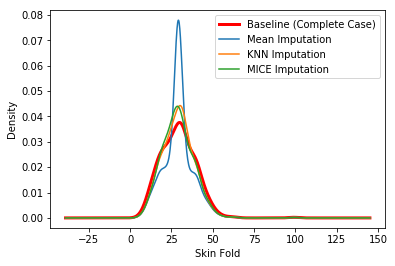

In [143]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_mean_imputed['Skin_Fold'].plot(kind='kde')
diabetes_knn_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mice_imputed['Skin_Fold'].plot(kind='kde')

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'KNN Imputation', 'MICE Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Skin Fold')

plt.show()